In [38]:
import numpy as np
import rasterio
import rasterio.plot
import tempfile
import pathlib
import io
from rasterio.enums import ColorInterp

In [13]:
def _make_dataset_from_array(arr):
    transform = rasterio.transform.from_origin(472137, 5015782, 0.5, 0.5)
    with tempfile.TemporaryDirectory() as tmp:
        dataset_writer = rasterio.open(
            pathlib.Path(tmp) / "img.tiff",
            "w",
            driver="GTiff",
            height=arr.shape[0],
            width=arr.shape[1],
            count=1,
            dtype=str(arr.dtype),
            crs="+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs",
            transform=transform,
        )
        dataset_writer.close()
        dataset = rasterio.open(pathlib.Path(tmp) / "img.tiff")

        return dataset


_make_dataset_from_array(np.ones((3, 3)))

<open DatasetReader name='/tmp/tmp0dw2x5ai/img.tiff' mode='r'>

In [17]:
def _make_dataset_from_array(arr):
    transform = rasterio.transform.from_origin(472137, 5015782, 0.5, 0.5)
    with tempfile.TemporaryDirectory() as tmp:
        dataset_writer = rasterio.open(
            pathlib.Path(tmp) / "img.tiff",
            "w",
            driver="GTiff",
            height=arr.shape[0],
            width=arr.shape[1],
            count=1,
            dtype=str(arr.dtype),
            crs="+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs",
        )
        dataset_writer.close()
        dataset = rasterio.open(pathlib.Path(tmp) / "img.tiff")

        return dataset


_make_dataset_from_array(np.ones((3, 3)))

/workspaces/ebseg/.venv/lib/python3.11/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(
/workspaces/ebseg/.venv/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='/tmp/tmpxbbtasxm/img.tiff' mode='r'>

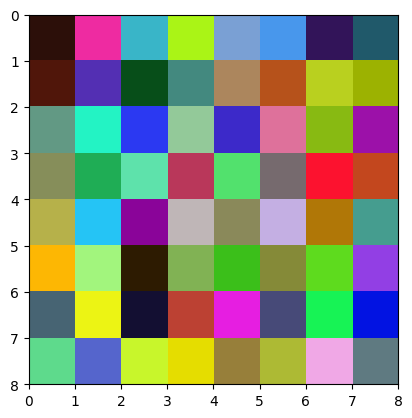

<Axes: >

In [75]:
def _make_dataset_from_array(arr, channels="RGB"):
    match channels:
        case "RGB":
            count = 3
            colorinterp = ColorInterp.red, ColorInterp.green, ColorInterp.blue
        case "RGBA":
            count = 4
            colorinterp = (
                ColorInterp.red,
                ColorInterp.green,
                ColorInterp.blue,
                ColorInterp.alpha,
            )
        case "undefined":
            count = 1
            colorinterp = ColorInterp.undefined

    file = io.BytesIO()
    dataset_writer = rasterio.open(
        file,
        "w",
        driver="GTiff",
        count=arr.shape[0],
        height=arr.shape[1],
        width=arr.shape[2],
        dtype=str(arr.dtype),
        crs="+proj=longlat +datum=WGS84 +no_defs",
        transform=rasterio.transform.Affine.identity(),
    )

    dataset_writer.write(arr)
    dataset_writer.colorinterp = colorinterp
    dataset_writer.close()
    dataset = rasterio.open(file)
    return dataset


array = np.random.random((4, 8, 8))
array[3, :, :] = 1
dataset = _make_dataset_from_array(array, channels="RGBA")
rasterio.plot.show(dataset)

In [47]:

def _make_dataset_from_channels(channel_data*):
    match channels:
        case "RGB":
            count = 3
            colorinterp = ColorInterp.red, ColorInterp.green, ColorInterp.blue
        case "RGBA":
            count = 4
            colorinterp = ColorInterp.red, ColorInterp.green, ColorInterp.blue, ColorInterp.alpha
        case "undefined":
            count = 1
            colorinterp = ColorInterp.undefined
        
    
    file = io.BytesIO()
    dataset_writer = rasterio.open(
        file, 'w', driver='GTiff',
        count=arr.shape[0],
        height = arr.shape[1], 
        width = arr.shape[2],
        dtype=str(arr.dtype),
        crs='+proj=longlat +datum=WGS84 +no_defs',
        transform=rasterio.transform.Affine.identity()
        )
    
    dataset_writer.write(arr)
    dataset_writer.colorinterp = colorinterp
    dataset_writer.close()
    dataset = rasterio.open(file)
    return dataset

array = np.random.random((4, 8, 8))
array[3, :, :] = 1
dataset = _make_dataset_from_array(
    array, 
    channels="RGBA")
rasterio.plot.show(dataset)

array([[[ 66, 164,  99],
        [151,  57, 163],
        [ 67, 108,  43]],

       [[ 28,  55,  65],
        [103, 118,  81],
        [214, 228, 252]],

       [[ 16, 102, 122],
        [ 48, 103, 184],
        [ 51, 197,  90]]])